In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,w=np.ones(5),rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,scale=1.):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    if rlz is not None:
        skk, okk = local.load_spec(qobj,mb,rlz=None,cn=cn)
        vkk = np.std(skk,axis=0)
        print(Vkk/vkk)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ymin=-0.3,ymax=1.6,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)/w[4]*1e6*scale,yerr=mb.bc**0.5*Vkk/w[4]*1e6*scale,fmt='o')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e6*scale,color='k',ls='--')
    #figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [7]:
dirs = local.data_directory()
qobj, Qobj = {}, {}
# combined
for wtype in ['com16v3pt','com16v0pt','com16v0PT']:
    aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [52]:
w = {wtype: tools_cmb.get_wfactors(['diff_dn'],3.,wtype=wtype)['diff_dn'] for wtype in ['com16v3pt','com16v0pt']}

wfactors: [2.64551209e-02 4.43198474e-08 1.08375184e-13 2.89033159e-19
 8.10469432e-25]
wfactors: [2.47789282e-02 6.91236469e-07 3.10845873e-11 1.60908806e-15
 9.12069538e-20]
wfactors: [1.98779519e-02 1.17519756e-06 8.70375332e-11 6.86867112e-15
 5.62093631e-19]
wfactors: [0.01995713 0.01550079 0.01450246 0.01400757 0.01369619]


[0.98358215 1.03021606 0.93188135 0.88725155 0.89639752 0.86036971
 0.89040593 0.87641009 0.83781501 0.7033926 ]
chi: 2.6 , chi (sim mean): -0.0 , chi (sim std): 4.0 , PTE: 0.58 
chi^2: 14.8 , chi^2 (sim): 11.2 , PTE: 0.21 
chi: 2.6 , chi (sim mean): -0.0 , chi (sim std): 4.0 , PTE: 0.58 
chi^2: 13.1 , chi^2 (sim): 11.2 , PTE: 0.27 


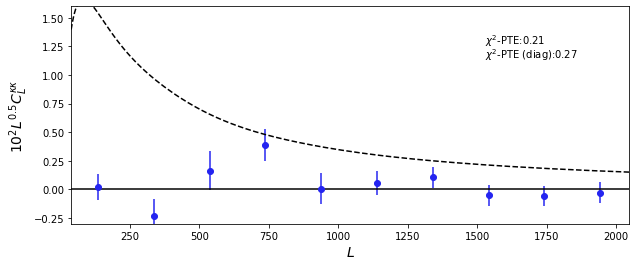

In [6]:
plot_spec(qobj['com16v3pt'],w['com16v3pt'],aobj.rlz,bnum=10)

chi: 2.7 , chi (sim mean): 0.0 , chi (sim std): 5.4 , PTE: 0.62 
chi^2: 10.6 , chi^2 (sim): 11.1 , PTE: 0.49 
chi: 2.7 , chi (sim mean): 0.0 , chi (sim std): 5.4 , PTE: 0.62 
chi^2: 7.2 , chi^2 (sim): 11.1 , PTE: 0.80 


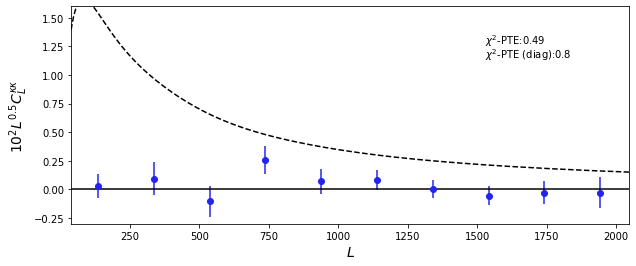

In [7]:
plot_spec(Qobj['com16v3pt'],w['com16v3pt'],cn=1)

[0.96492606 1.01093363 0.92160159 0.8660545  0.95742828 0.86747808
 0.90886316 0.90586341 0.82738267 0.70500923]
chi: 4.6 , chi (sim mean): -0.0 , chi (sim std): 3.7 , PTE: 0.20 
chi^2: 11.0 , chi^2 (sim): 11.1 , PTE: 0.44 
chi: 4.6 , chi (sim mean): -0.0 , chi (sim std): 3.7 , PTE: 0.20 
chi^2: 9.8 , chi^2 (sim): 11.1 , PTE: 0.57 


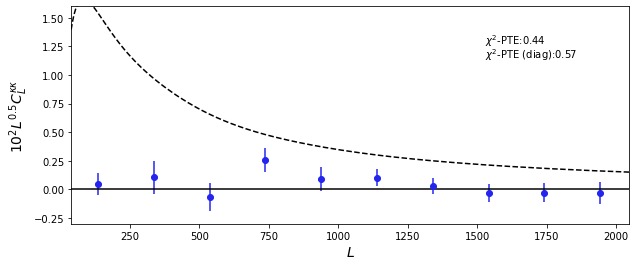

In [8]:
plot_spec(Qobj['com16v3pt'],w['com16v3pt'],rlz=aobj.rlz,cn=1)

chi: 8.1 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.12 
chi^2: 12.9 , chi^2 (sim): 11.2 , PTE: 0.31 
chi: 8.1 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.12 
chi^2: 12.7 , chi^2 (sim): 11.2 , PTE: 0.33 


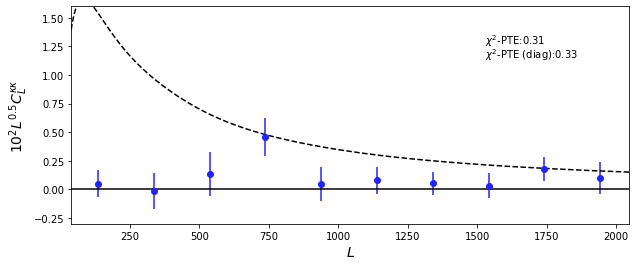

In [10]:
plot_spec(qobj['com16v0pt'],bnum=10)

chi: 6.8 , chi (sim mean): 0.0 , chi (sim std): 5.5 , PTE: 0.14 
chi^2: 11.6 , chi^2 (sim): 11.2 , PTE: 0.39 
chi: 6.8 , chi (sim mean): 0.0 , chi (sim std): 5.5 , PTE: 0.14 
chi^2: 11.1 , chi^2 (sim): 11.2 , PTE: 0.44 


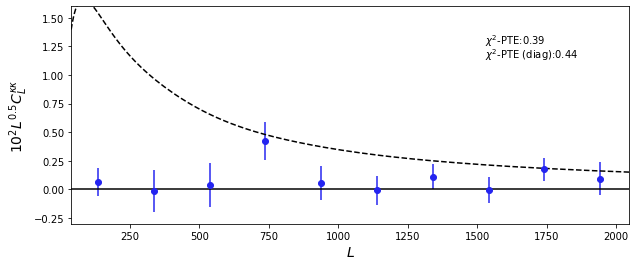

In [9]:
plot_spec(qobj['com16v0PT'],bnum=10)

chi: 9.9 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.06 
chi^2: 18.4 , chi^2 (sim): 11.1 , PTE: 0.07 
chi: 9.9 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.06 
chi^2: 20.2 , chi^2 (sim): 11.1 , PTE: 0.04 


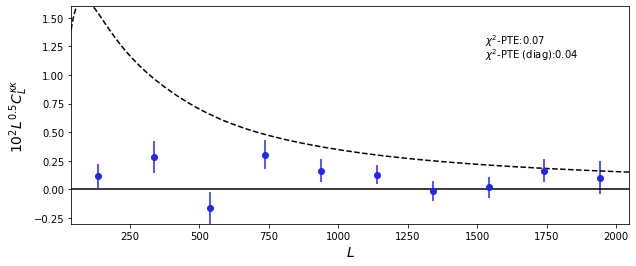

In [11]:
plot_spec(Qobj['com16v0pt'],bnum=10)

chi: 4.8 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.28 
chi^2: 12.7 , chi^2 (sim): 11.1 , PTE: 0.32 
chi: 4.8 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.28 
chi^2: 11.4 , chi^2 (sim): 11.1 , PTE: 0.38 


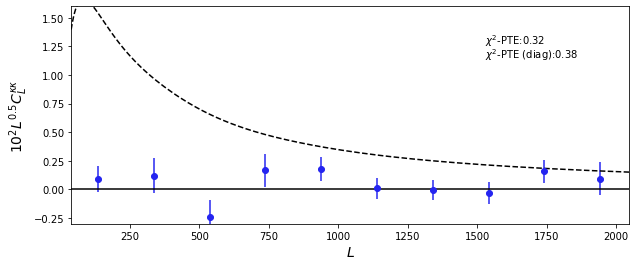

In [13]:
plot_spec(Qobj['com16v0PT'],bnum=10)